In [ ]:
# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

#Importing the data

In [2]:
df=pd.read_csv(r"C:\Users\padru\Downloads\spam.csv")

In [3]:
df.shape

(5572, 2)

In [4]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
from wordcloud import WordCloud

In [6]:
ham_words=''.join(df[df['Category'] == 'ham']['Message'].values)

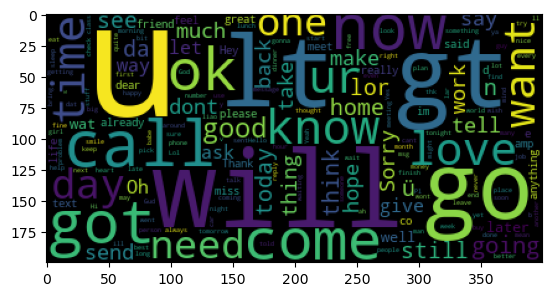

In [7]:
ham_plot = WordCloud().generate(ham_words)
plt.imshow(ham_plot)

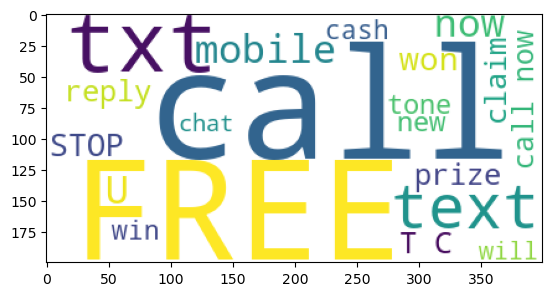

In [8]:
spam_words = ''.join(df[df['Category'] == 'spam']['Message'].values)
spam_plot = WordCloud(max_words=20,background_color='white') .generate(spam_words)
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

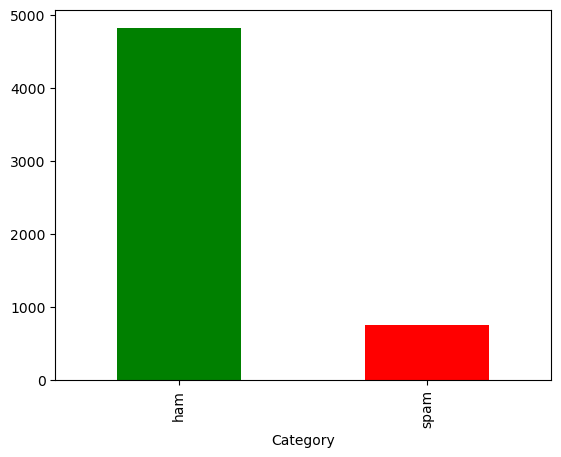

In [9]:
df['Category'].value_counts().plot(kind = 'bar',color=['green','red'])

In [10]:
X = df.drop('Category',axis=1)

##BAG OF WORDS

In [11]:
bow = CountVectorizer(stop_words='english')

In [12]:
bow.fit(df['Message'])
x=bow.transform(df['Message']).toarray()
y=df['Category']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

##KNN

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9210762331838565

#NAIVE BAYES

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9811659192825112

#DECISSION TREE

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9721973094170404

In [19]:
import pickle

In [20]:
pickle.dump(nb,open('model.pkl','wb'))

In [26]:
email=input("Enter the email ID:   ")
data=bow.transform([email]).toarray()
nb.predict(data)[0]

Enter the email ID:    Subject: Congratulations! You've Won $1,000,000!  Dear Winner,  We are pleased to inform you that you've won $1,000,000 in our lottery! Please contact our claims department to process your prize.  [Contact Information for Scammers]  Best regards, Lottery Management Team


'spam'

#PICKEL

In [23]:
import pickle

In [31]:
# pickle.dump(nb,open("nb.pkl""wb"))
pickle.dump(nb,open("nb.pkl","wb"))
pickle.dump(bow,open("bow.pkl","wb"))

In [32]:
bow = CountVectorizer(stop_words='english')
bow.fit(df['Message'])
pickle.dump(bow,open(r"C:\Users\padru\bow.pkl","wb"))

DEPLOYEMENT

# DEPLOYEMENT


In [33]:
email=input("Enter the email ID:   ")
data=bow.transform([email]).toarray()
nb.predict(data)[0]

Enter the email ID:    Subject: Payment Confirmation: Invoice #123456  Dear Customer,  Your recent payment of $500 has been processed successfully. For further details, please download the invoice attached.  [Malware-Infected Attachment]  Regards, Accounts Department


'spam'

In [38]:
email=input("Enter the email ID:   ")
data=bow.transform([email]).toarray()
Result=nb.predict(data)[0]
Result


Enter the email ID:    Subject: Incredible Weight Loss Solution!  Hi,  Lose 10 pounds in 5 days with our revolutionary new weight loss product! Try it now and see the results for yourself.  [Suspicious Link]  Regards, Weight Loss Solutions Team


'ham'